# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [42]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

First I want to identify any null or missing data and show the shape of the dataset

In [43]:
# Your code to explore the data
df_flights.shape

(271940, 20)

We are working with 271,940 rows and 20 columns

Let's see how many null values we have

In [44]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

We can see that there are 2761 values that are null in DepDel15 column 

Now I want to see what is the reason for the null values

In [45]:
df_flights[df_flights.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


From what the data shows the NaN values are caused by the non delayed flights. Let's put 0 in those places.

In [46]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0.0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

We've got rid of those zeroes. Now we can proceed to find any outliners in DepDelay and ArrDelay

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



C:\Users\jakub.komon\AppData\Local\Temp\ipykernel_29504\1058729835.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jakub.komon\AppData\Local\Temp\ipykernel_29504\1058729835.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


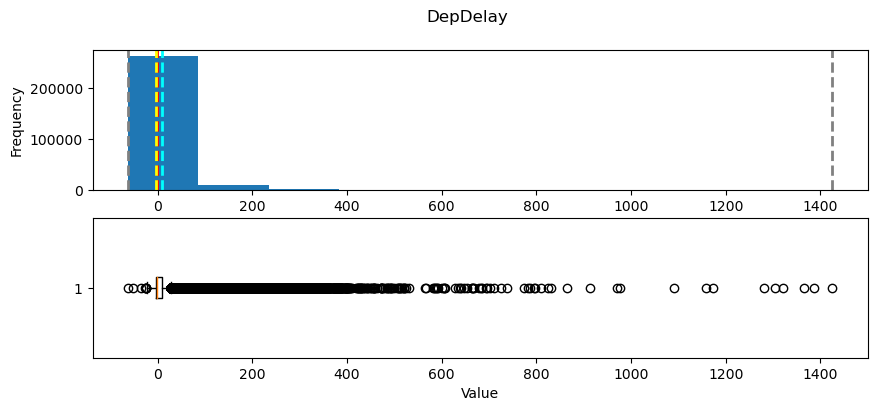

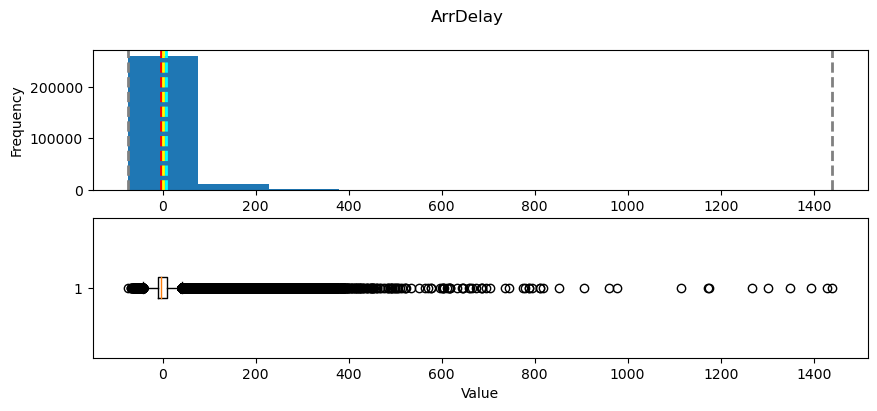

In [47]:
%matplotlib inline
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    
    
    fig, ax = plt.subplots(2, 1, figsize = (10, 4))

    ax[0].hist(var_data)
    ax[0].set_ylabel("Frequency")
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel("Value")

    fig.suptitle(var_data.name)
    

    fig.show()

delay = ['DepDelay', 'ArrDelay']
for col in delay:
    show_distribution(df_flights[col])

By looking at those two figures we can say that outliners occur in both DepDelay and ArrDelay. Now let's get rid of the outliners and see how the plot looks like

Minimum:-11.00
Mean:-0.13
Median:-2.00
Mode:-3.00
Maximum:36.00

Minimum:-32.00
Mean:-5.68
Median:-6.00
Mode:0.00
Maximum:16.00



C:\Users\jakub.komon\AppData\Local\Temp\ipykernel_29504\1058729835.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jakub.komon\AppData\Local\Temp\ipykernel_29504\1058729835.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


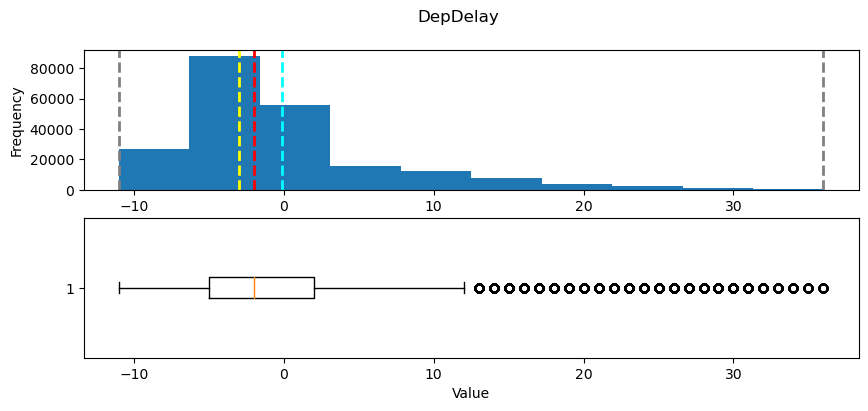

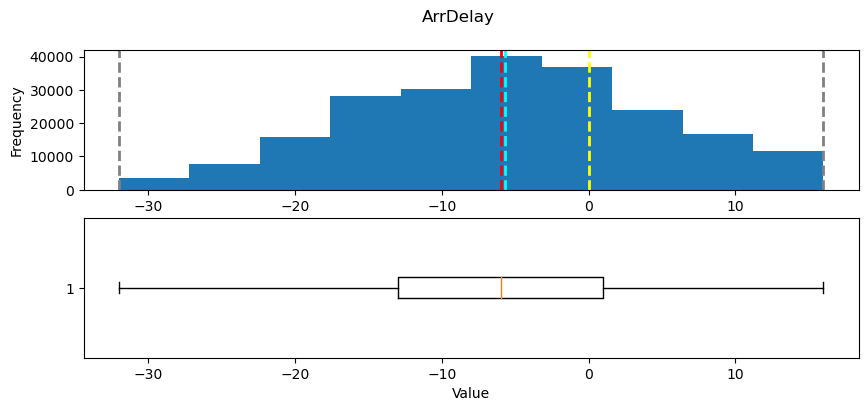

In [48]:
DepDelay1stPerc = df_flights.DepDelay.quantile(0.01)
DepDelay90thPerc = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay > DepDelay1stPerc]
df_flights = df_flights[df_flights.DepDelay < DepDelay90thPerc]

ArrDelay1stPerc = df_flights.ArrDelay.quantile(0.01)
ArrDelay90thPerc = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay > ArrDelay1stPerc]
df_flights = df_flights[df_flights.ArrDelay < ArrDelay90thPerc]

for col in delay:
    show_distribution(df_flights[col])

This looks better

Now i'm going to proceed to the second part of the task.

Let's see the summary statistics for numeric fields

In [49]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214500.0,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000
mean,2013.0,7.027296,15.799389,3.904168,12755.329371,12734.206438,1284.230942,-0.130452,0.057604,1465.878522,-5.680522,0.032597,0.013305
std,0.0,2.006267,8.853235,1.998344,1512.139480,1506.103555,470.230018,7.260672,0.232993,487.646410,10.188473,0.177579,0.114579
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,853.000000,-5.000000,0.000000,1055.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1240.000000,-2.000000,0.000000,1448.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1658.000000,2.000000,0.000000,1850.000000,1.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,16.000000,1.000000,1.000000


Now we will calculate average departure and arrival delays

In [50]:
print("Average departure delay: {:.2f}".format(df_flights["DepDelay"].mean()))
print("Average arrival delay: {:.2f}".format(df_flights["ArrDelay"].mean()))

Average departure delay: -0.13
Average arrival delay: -5.68


From averages values we can say that on the average flights depart earlier than scheduled

In [51]:
df_flights.groupby("Carrier")["ArrDelay"].mean()

Carrier
9E   -8.228756
AA   -6.515212
AS   -4.693353
B6   -6.858014
DL   -7.233575
EV   -7.435889
F9   -1.693284
FL   -4.740232
HA   -2.925074
MQ   -5.252113
OO   -4.975784
UA   -8.296229
US   -5.377076
VX   -6.297268
WN   -2.931664
YV   -4.534726
Name: ArrDelay, dtype: float64

In [52]:
df_flights.groupby("Carrier")["DepDelay"].mean()

Carrier
9E   -2.321457
AA    0.040432
AS   -2.947292
B6   -1.557859
DL   -0.962449
EV   -1.561652
F9   -0.223881
FL    0.456615
HA   -2.991150
MQ   -1.039725
OO   -2.149600
UA    0.870988
US   -2.227464
VX   -0.213479
WN    3.009088
YV   -1.992958
Name: DepDelay, dtype: float64

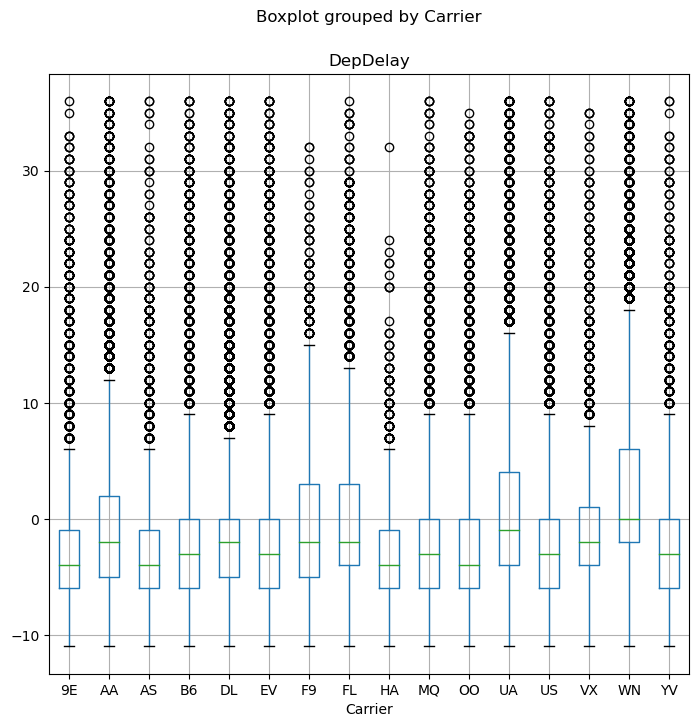

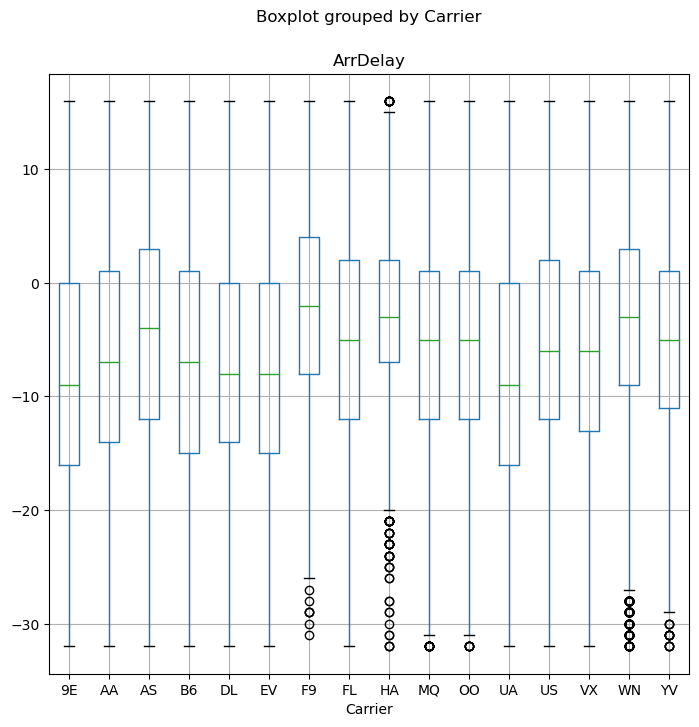

In [53]:
for col in delay:
    df_flights.boxplot(column=col, by="Carrier", figsize=(8,8))

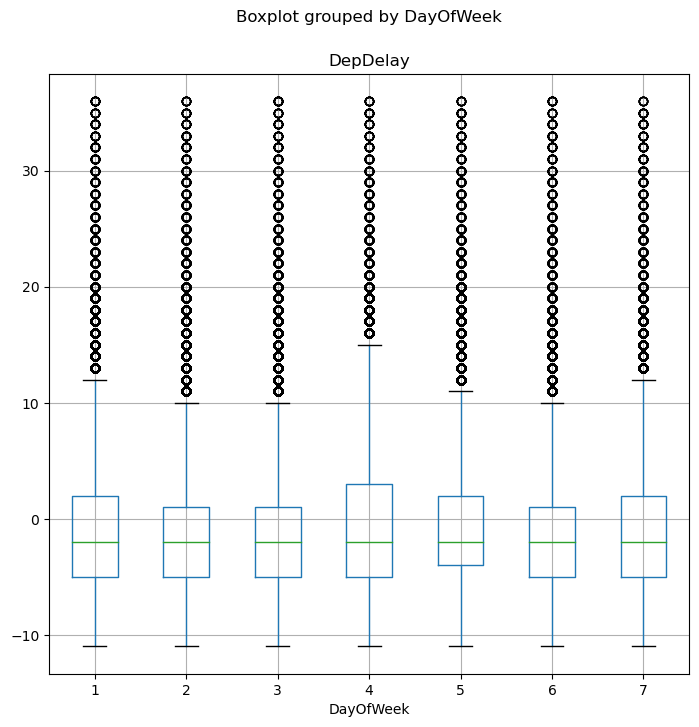

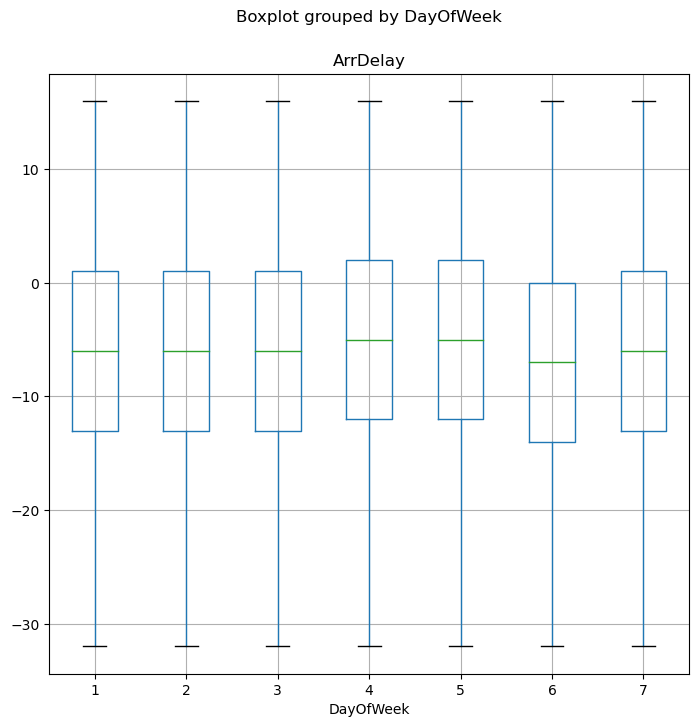

In [54]:
for col in delay:
    df_flights.boxplot(column=col, by="DayOfWeek", figsize=(8,8))

OriginAirportName
Chicago Midway International                            3.865294
Dallas Love Field                                       3.039141
William P Hobby                                         2.706247
Denver International                                    1.863804
Baltimore/Washington International Thurgood Marshall    1.805401
                                                          ...   
Tucson International                                   -2.522114
Richmond International                                 -2.665944
Ted Stevens Anchorage International                    -2.886700
Kahului Airport                                        -2.905252
Long Beach Airport                                     -3.349229
Name: DepDelay, Length: 70, dtype: float64

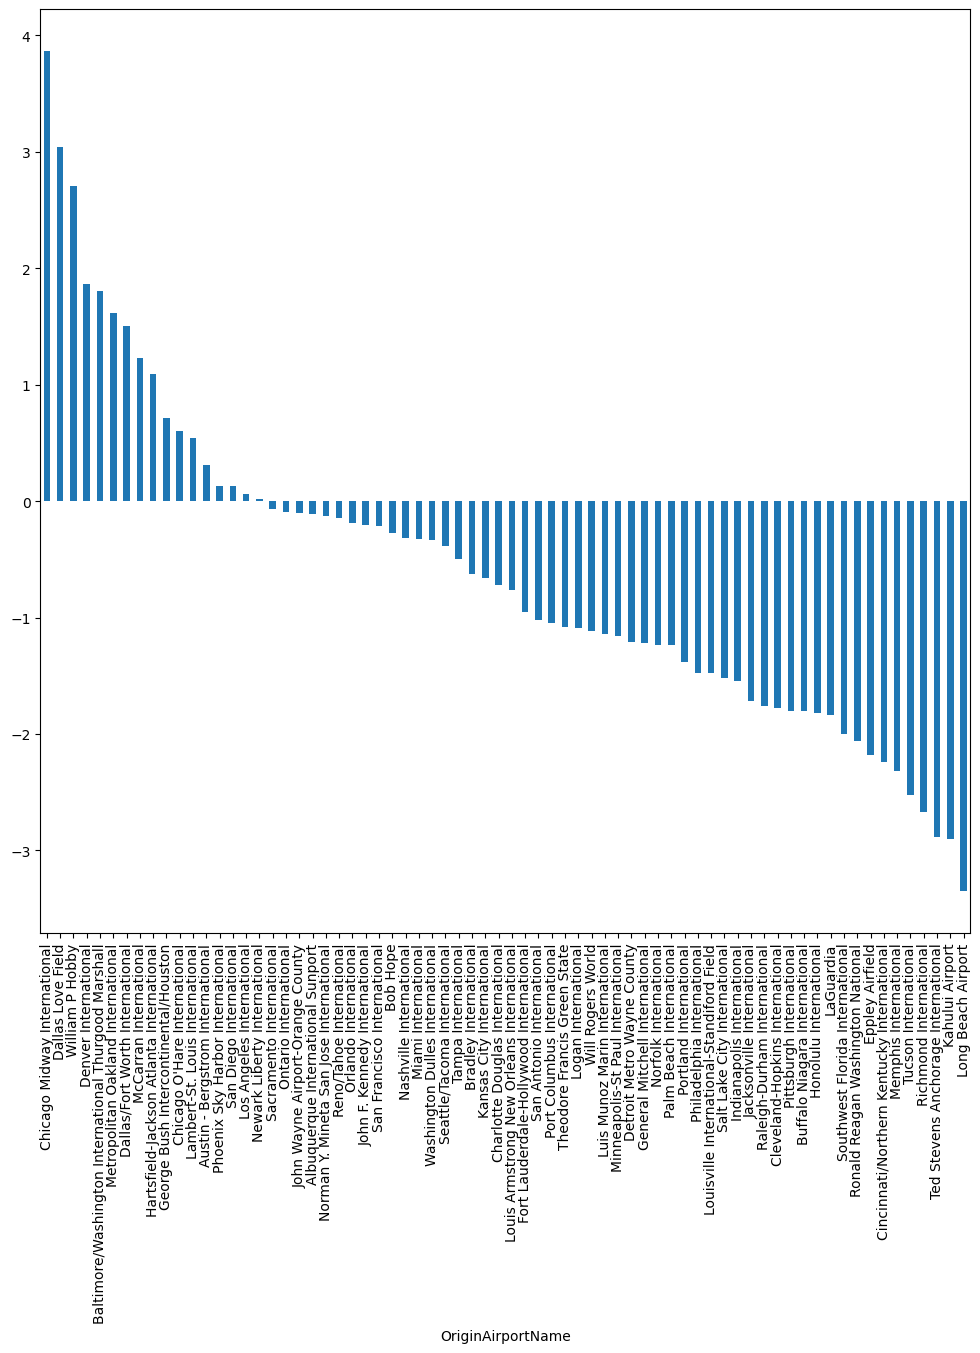

In [55]:
result = df_flights.groupby("OriginAirportName")["DepDelay"].mean().sort_values(ascending=False)
result.plot(kind = "bar", figsize=(12,12))
result


In [56]:
df_flights.groupby("DepDel15")["ArrDelay"].mean()

DepDel15
0.0   -6.482473
1.0    7.439382
Name: ArrDelay, dtype: float64

<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

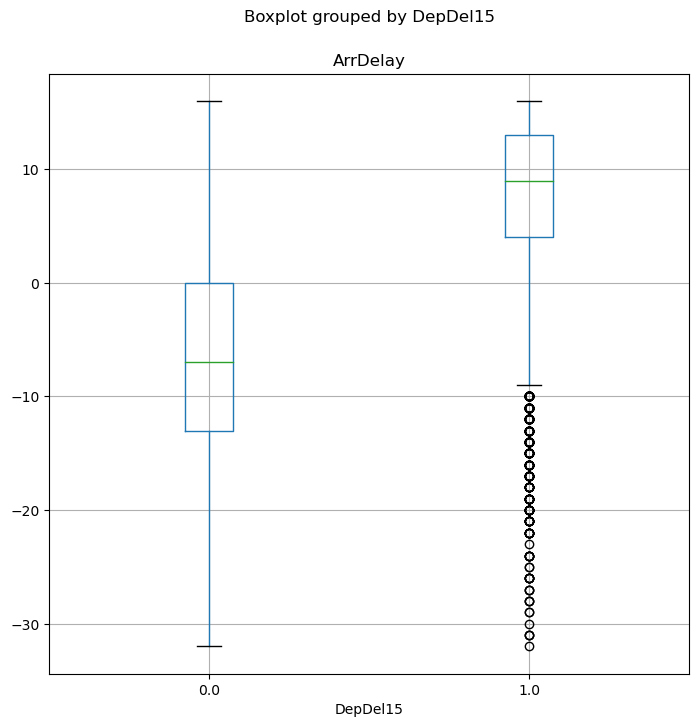

In [57]:
df_flights.boxplot(column="ArrDelay", by="DepDel15", figsize=(8,8))

In [58]:
routes = pd.Series(df_flights["OriginAirportName"] + " > " + df_flights["DestAirportName"])
df_flights = pd.concat([df_flights, routes.rename('Route')], axis=1)

route_group = df_flights.groupby('Route')['ArrDel15'].agg('sum').reset_index()
route_group.sort_values(by='ArrDel15', ascending=False)

,Route,ArrDel15
2183,San Francisco International > Los Angeles Inte...,67
1200,Los Angeles International > San Francisco Inte...,42
553,Detroit Metro Wayne County > Chicago O'Hare In...,29
1027,LaGuardia > Logan International,29
1012,LaGuardia > Chicago O'Hare International,27
...,...,...
1622,Norman Y. Mineta San Jose International > Hono...,0
1621,Norman Y. Mineta San Jose International > Hart...,0
1620,Norman Y. Mineta San Jose International > Geor...,0
752,Hartsfield-Jackson Atlanta International > Bra...,0


In [60]:
df_flights.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False)

Route
Theodore Francis Green State > Southwest Florida International       12.000000
Charlotte Douglas International > General Mitchell International     10.000000
Indianapolis International > Philadelphia International              10.000000
Port Columbus International > Logan International                     7.000000
Cleveland-Hopkins International > Philadelphia International          7.000000
                                                                       ...    
Lambert-St. Louis International > Cleveland-Hopkins International   -20.000000
Jacksonville International > Chicago Midway International           -20.000000
Eppley Airfield > LaGuardia                                         -20.750000
Denver International > Kahului Airport                              -22.666667
Indianapolis International > Logan International                    -26.000000
Name: ArrDelay, Length: 2479, dtype: float64